In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Please note that there is no splitting of dataset required as I already have two different sets here

### Load the MNIST dataset

In [2]:
# load our dataset
train_data = pd.read_csv('mnist_train.csv')


### Split the training data into a training and development(test) set.
This is not required as mycvs files are seprate for Training and Test data. I have already discussed this with Alfred and he is ok with it

### Add a comment explaining the purpose of the train, development(test) and test(validation) sets
Train: Training dataset is used to train your classification / regression model. Training dataset needs to have a variety of data overall so that you get a good accuracy when you try to get predictions from it
Development: The development set is used to see whether the model seems to be generalising well to data that is not in the training set. This makes it possible to spot and try to remedy under- or overfitting.
Test: Only at the end do we test the model on totally unseen data. Another term for this third type of held-out data is the validation set

In [3]:
train_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Getting some stats on the data
train_data.describe()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,4.453924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,2.889294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Selecting X and y values from the Training dataset

In [5]:
# X / independent values everything except the first column
X = train_data.iloc[: , 1:].values
# y values will only have the first column which is labels of the numbers
y = train_data.iloc[:, 0].values

#Printing the shape of the training data
print('Xshape', X.shape, 'yshape', y.shape)

Xshape (59999, 784) yshape (59999,)


### Use the RandomForestClassifier built into sklearn to create a classification model

In [6]:
# Definng the random forest classifier
r=42
ensemble_RF = RandomForestClassifier(n_estimators = 10, random_state=r, criterion='gini')
ensemble_RF.fit(X, y)
# printing the score
print('Accuracy RandomForest: ', ensemble_RF.score(X, y))



Accuracy RandomForest:  0.9990166502775046


### Pick one parameter to tune, and explain why you chose this parameter.

I have chosen two parameter for tuning here. criterion and n_estimator. I have chosen criterion to see the impact it has when you change the split / quality of split. The n_estimator is selected to see how it impacts the accuracy when the number of estimators trees in the forest are increased.

I am going to use the GridSearchCV function to pass on the different parameter values. For criterion, I am going to use gini and entropy methods where as for n_estimators I have selected 50 and 100. The n_estomators are limited due to the performance on the system but potentially that can be incresed to the optimum number on a powerful computer

Once the GridSearchCV gives me best parameters, I have then recalculated the accuracy scores

In [7]:
# Create the parameter list for GridSearchCV
parameters = [{'criterion' : ['gini'], 'n_estimators' : [50, 100]},
              {'criterion' : ['entropy'], 'n_estimators' : [50, 100]}]

# Create a grid search variable / object for our RandomForest estmator
grid_search = GridSearchCV(estimator=ensemble_RF,
                          param_grid=parameters,
                          scoring = 'accuracy',
                          cv=10,
                          n_jobs= -1)

In [8]:
# Fit X and y data
grid_search = grid_search.fit(X, y)

In [9]:
# Printing the best parameters values from our list given
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 100}

### Choose which value for the parameter to set for testing on the test data and explain why.
As you can see from the above cell 'best_params_', it has given me the values for criterion and n_estimator as gini and 100. So I have run it again for the these selected parameters.

In [10]:
# Now run the Random Forest againa and print the score to see any possible improvements
# Definng the random forest classifier
r=42
ensemble_RF = RandomForestClassifier(n_estimators = 100, random_state=r, criterion='gini')
ensemble_RF.fit(X, y)
# printing the score
print('Accuracy RandomForest: ', ensemble_RF.score(X, y))

Accuracy RandomForest:  1.0


#### Loading the test data


In [11]:
# load our dataset
test_data = pd.read_csv('mnist_test.csv')

In [12]:
# Select X and y values
X_test = test_data.iloc[: , 1:].values
y_test = test_data.iloc[:, 0].values
#y = y.reshape(-1, 1)
# printing the shape
print('Xshape', X_test.shape, 'yshape', y_test.shape)
print(X)

Xshape (9999, 784) yshape (9999,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
# Generating y predictions
y_pred = ensemble_RF.predict(X_test)

### Print the confusion matrix for your Random Forest model on the test set

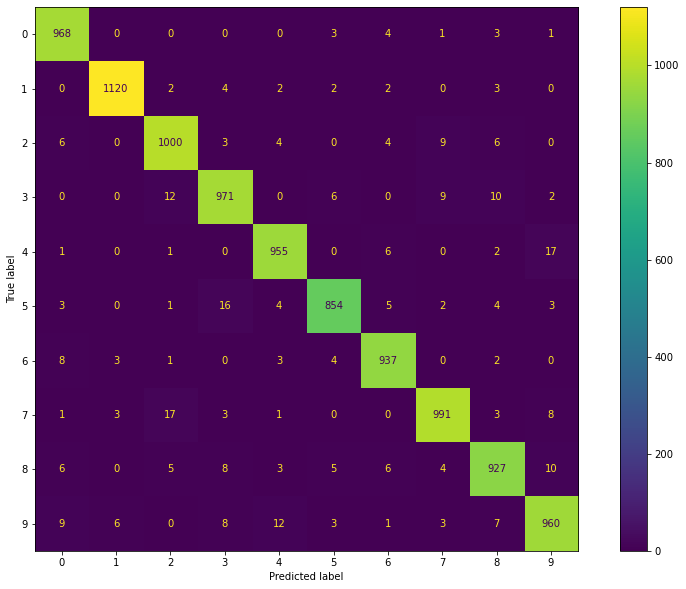

In [14]:
# Creating a classes list to better display the columns and indexes

cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(cm, columns=classes, index = classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize =(15, 10))
disp.plot(ax = ax)

### Report which classes the model struggles with the most
As per the results below, it shows that the classes 5 has struggled the most with the lowest f1_score

### Please note that I have discussed this with Alfred and he recommended that I answer this question by calculating the f1_score

In [15]:
# Calculating the f1_score to find out which classes will struggle the most
f1score = f1_score(y_test, y_pred, average = None)
# Defining the index to display it with pandas series
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Defining pandas dataframe to display the results better and sorting it in descending order
f1_score_pd = pd.Series(f1score, index = classes).sort_values(ascending=False)
# Displaying results
f1_score_pd

1    0.988090
0    0.976791
6    0.974519
4    0.971516
7    0.968719
2    0.965717
5    0.965517
3    0.959960
9    0.955224
8    0.955178
dtype: float64

In [16]:
# Printing the Classification Report
# This report gives us details about all the scores that have been asked in the next question
# It gives us scores accross individual classes as well as the global scores
cr = classification_report(y_test, y_pred, digits = 4)
print(cr)

              precision    recall  f1-score   support

           0     0.9661    0.9878    0.9768       980
           1     0.9894    0.9868    0.9881      1135
           2     0.9625    0.9690    0.9657      1032
           3     0.9585    0.9614    0.9600      1010
           4     0.9705    0.9725    0.9715       982
           5     0.9738    0.9574    0.9655       892
           6     0.9710    0.9781    0.9745       958
           7     0.9725    0.9649    0.9687      1027
           8     0.9586    0.9517    0.9552       974
           9     0.9590    0.9514    0.9552      1009

    accuracy                         0.9684      9999
   macro avg     0.9682    0.9681    0.9681      9999
weighted avg     0.9684    0.9684    0.9684      9999



### Report the accuracy, precision, recall, and f1-score
Please find the details of each of the scores here. I have used average = 'micro' to get the global scores and not the scores for each class.
The classification report displayed in the cell above also confirms the same results

In [17]:
# Calculating the scores
acc = accuracy_score(y_test, y_pred)
prc = precision_score(y_test, y_pred, average='micro')
recl = recall_score(y_test, y_pred, average='micro')
fone = f1_score(y_test, y_pred, average='micro')

# Printing the scores
print(f'Accuracy score: {acc}')
print(f'Precision Score: {prc}')
print(f'Recall Score: {recl}')
print(f'f1 Score: {fone}')


Accuracy score: 0.9683968396839684
Precision Score: 0.9683968396839684
Recall Score: 0.9683968396839684
f1 Score: 0.9683968396839684
